In [ ]:
!pip install dionysus
!pip install gudhi
!pip install POT

In [10]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

py_file_location = "/content/drive/MyDrive/NASA/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/MyDrive/NASA")
!ls -ltr

In [4]:
import Low_noise_Alpha_Gamma_Test_on_TDA

Imported Successfully


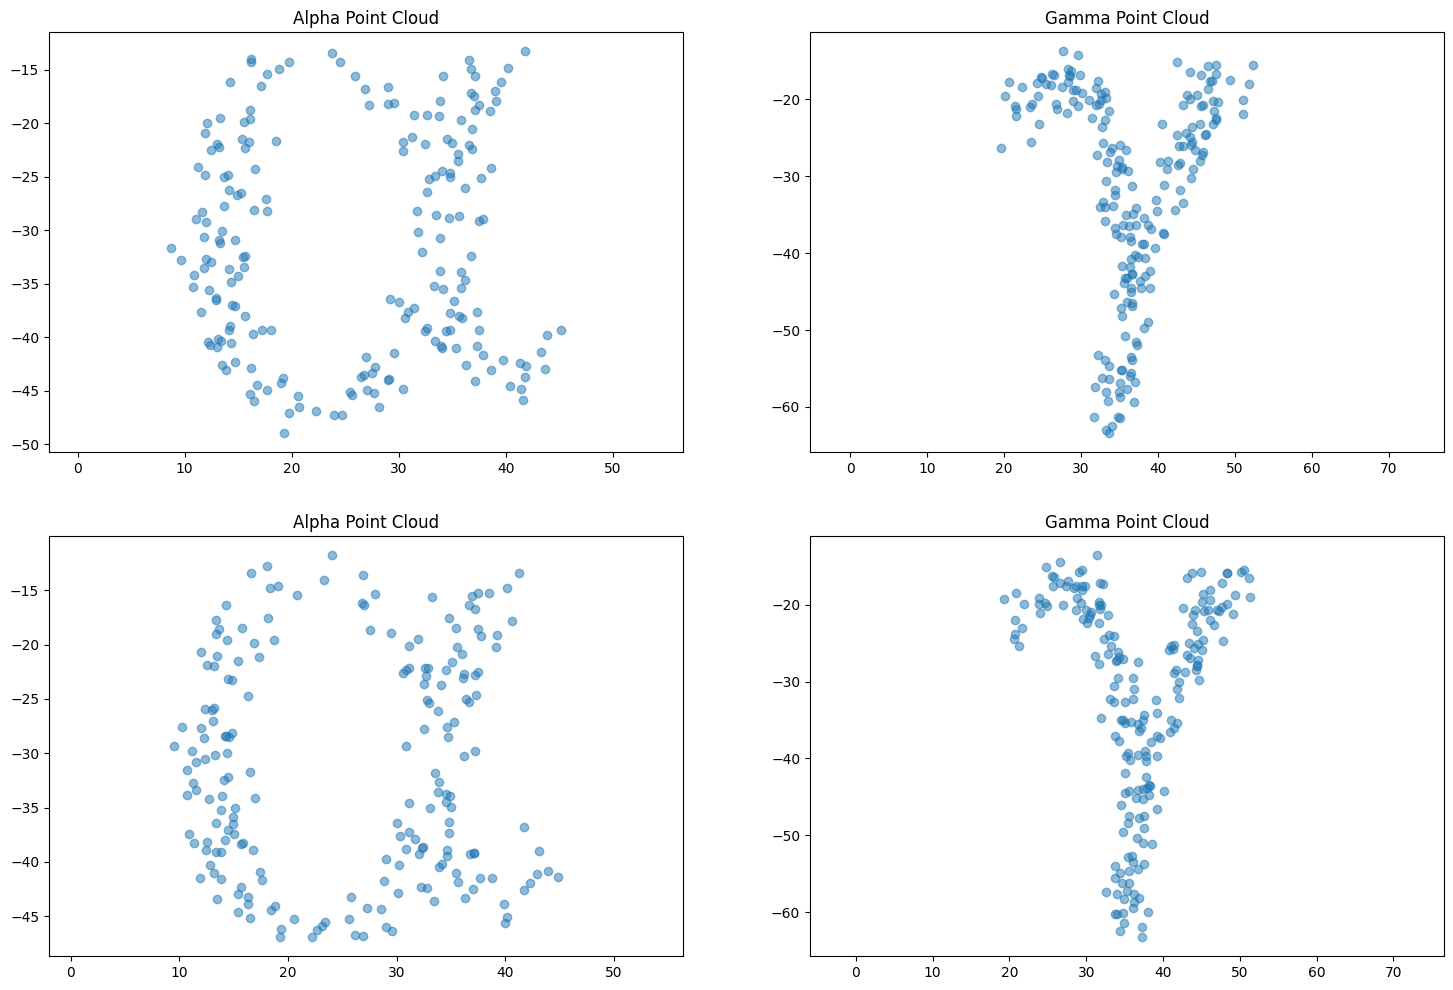

In [7]:
# Path to the images of alpha and gamma
alpha_image_path = 'alpha.png'
gamma_image_path = 'gamma.png'

# Generate point clouds
n_samples = 200
n_clouds = 7  # Number of point clouds to generate
noise_level = 1
alpha_point_clouds = Low_noise_Alpha_Gamma_Test_on_TDA.image_to_point_clouds(alpha_image_path, noise_level, n_samples, n_clouds)
gamma_point_clouds = Low_noise_Alpha_Gamma_Test_on_TDA.image_to_point_clouds(gamma_image_path, noise_level, n_samples, n_clouds)

# Plotting the first point cloud of alpha and gamma for demonstration
plt.figure(figsize=(18, 12))

# Alpha
plt.subplot(2, 2, 1)
plt.scatter(alpha_point_clouds[0][:, 1], -alpha_point_clouds[0][:, 0], alpha=0.5)
plt.title('Alpha Point Cloud')
plt.axis('equal')

# Gamma
plt.subplot(2, 2, 2)
plt.scatter(gamma_point_clouds[0][:, 1], -gamma_point_clouds[0][:, 0], alpha=0.5)
plt.title('Gamma Point Cloud')
plt.axis('equal')

plt.subplot(2, 2, 3)
plt.scatter(alpha_point_clouds[1][:, 1], -alpha_point_clouds[1][:, 0], alpha=0.5)
plt.title('Alpha Point Cloud')
plt.axis('equal')

# Gamma
plt.subplot(2, 2, 4)
plt.scatter(gamma_point_clouds[1][:, 1], -gamma_point_clouds[1][:, 0], alpha=0.5)
plt.title('Gamma Point Cloud')
plt.axis('equal')
plt.show()

In [8]:
samples = alpha_point_clouds + gamma_point_clouds

In [12]:
pd0_union = []
pd1_union = []
pd0 = []
pd1 = []

PD_dict = {}
for i in np.arange(n_clouds*2):
    print ('Working on number {}'.format(i))
    p0, p1 = Low_noise_Alpha_Gamma_Test_on_TDA.getPD(samples[i], 50)


    PD_dict['PD{} dim0'.format(i)] = np.column_stack((p0[0],p0[1]))
    PD_dict['PD{} dim1'.format(i)] = np.column_stack((p1[0],p1[1]))

    pd0_union.append(p0)
    pd1_union.append(p1)
    pd0.append(p0)
    pd1.append(p1)

Working on number 0
Working on number 1
Working on number 2
Working on number 3
Working on number 4
Working on number 5
Working on number 6
Working on number 7
Working on number 8
Working on number 9
Working on number 10
Working on number 11
Working on number 12
Working on number 13


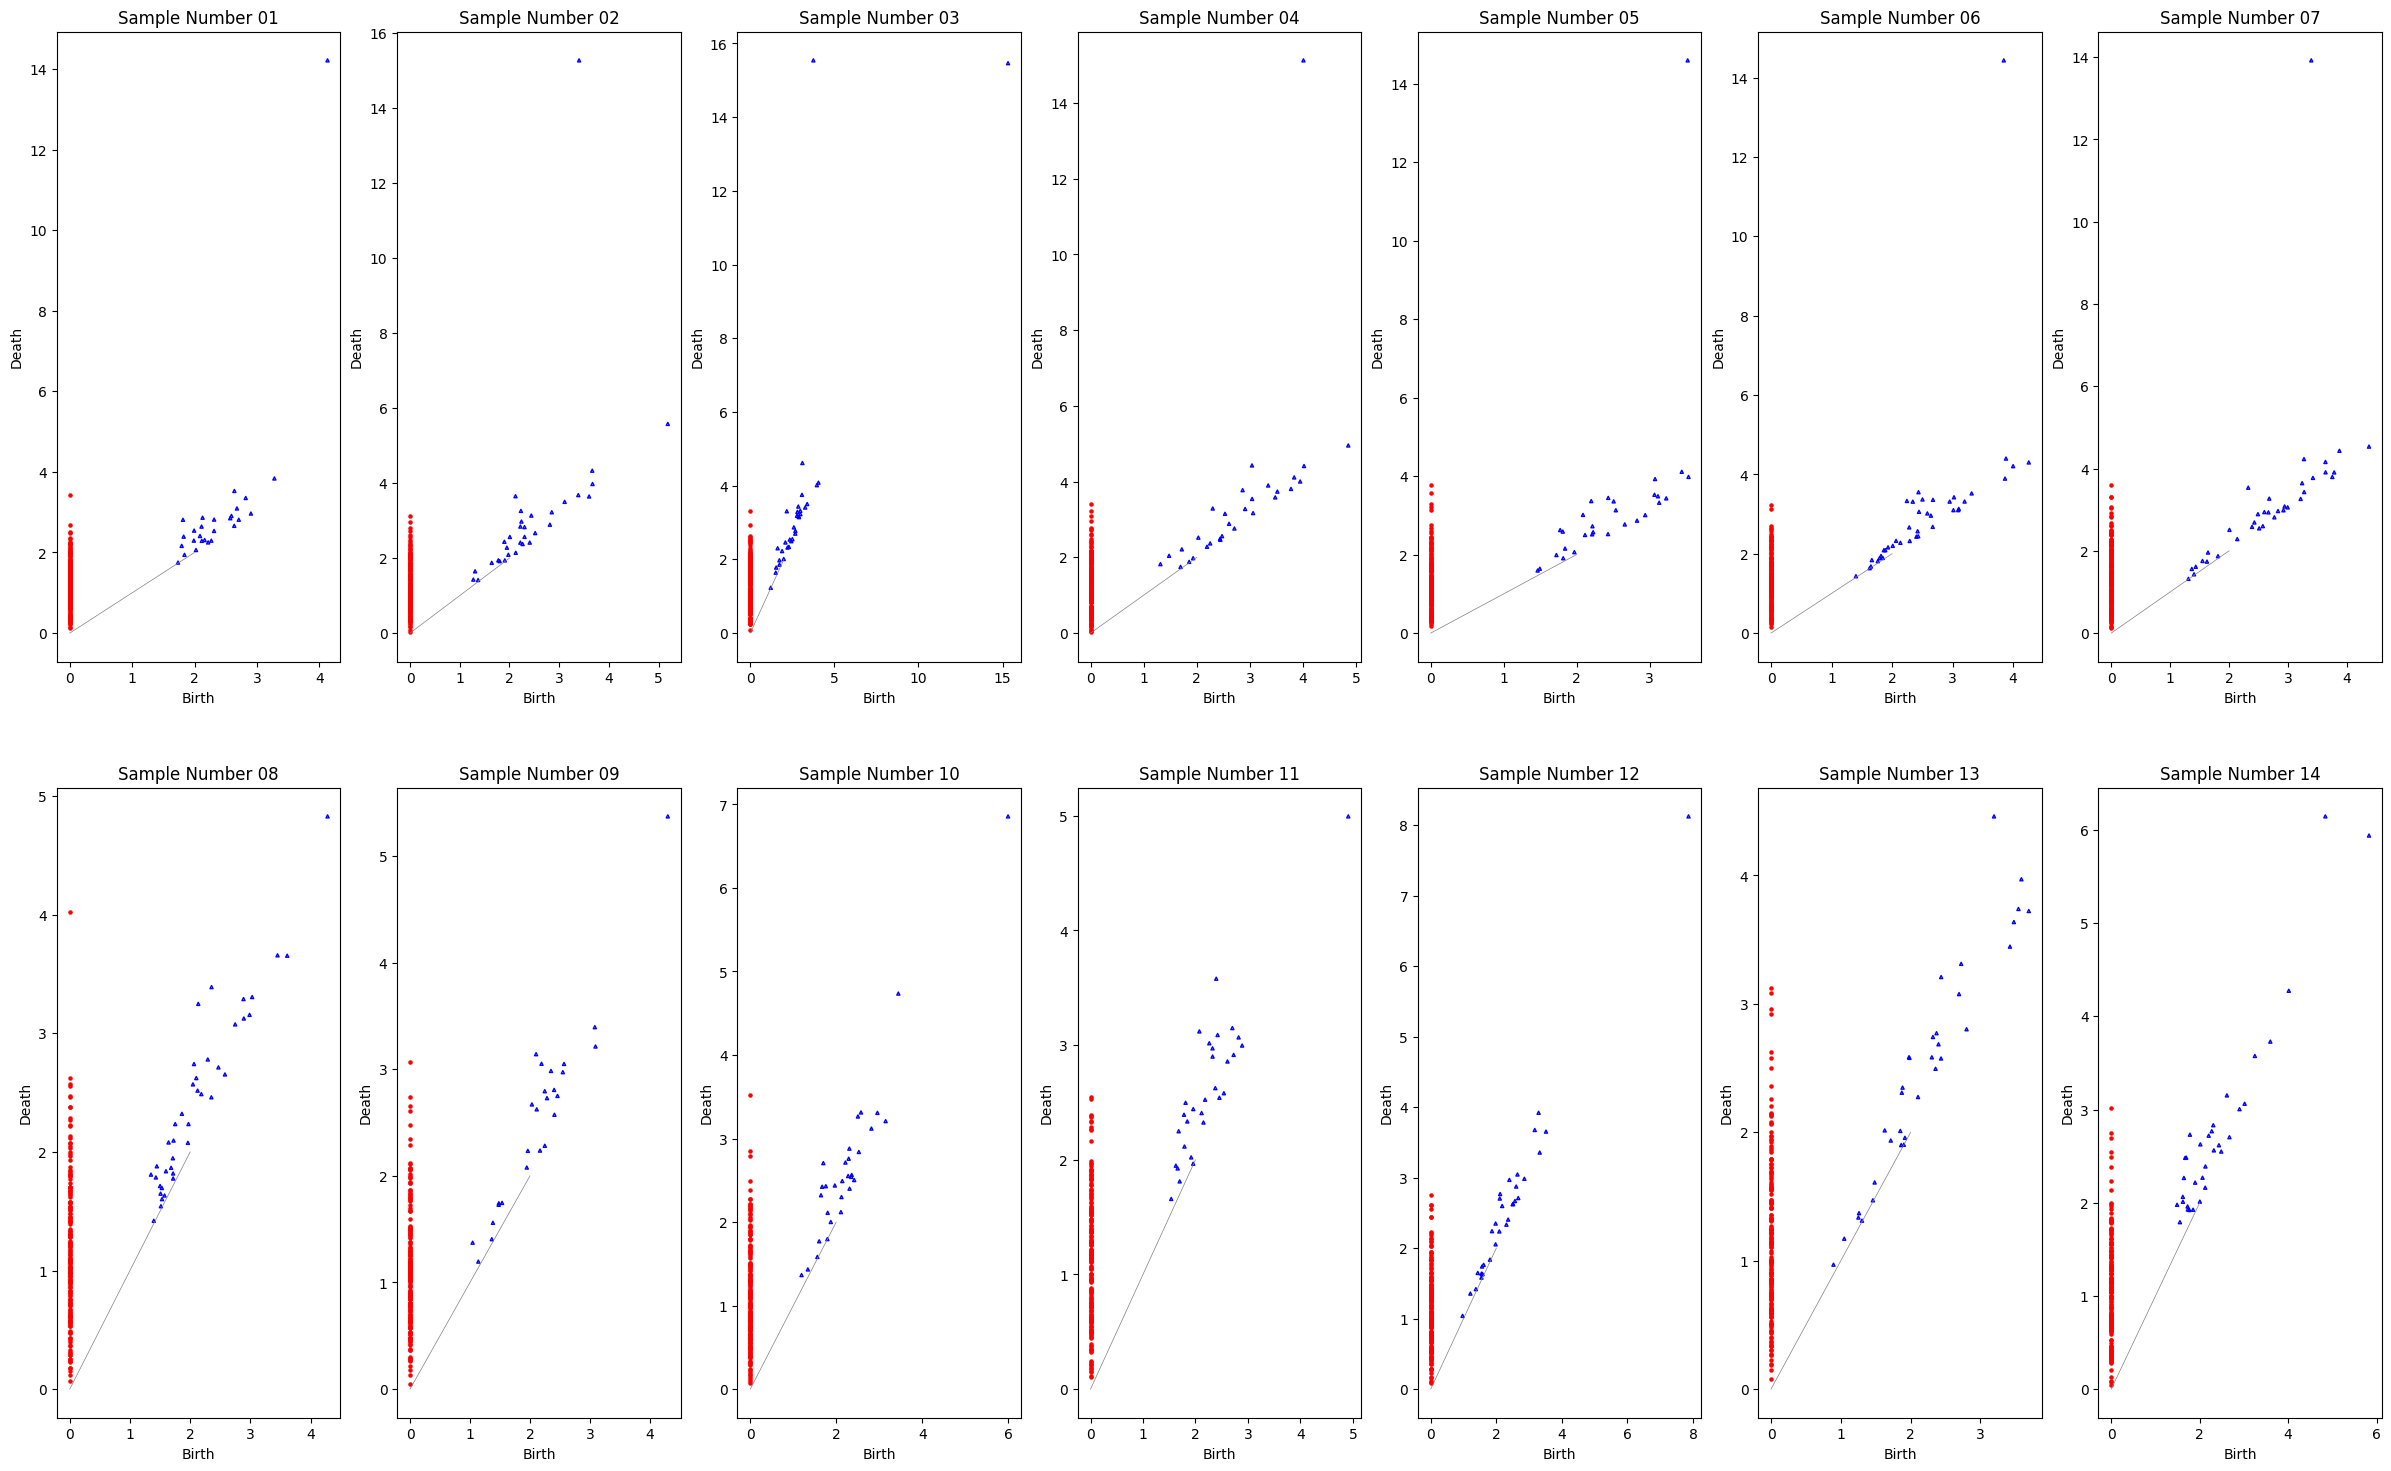

In [13]:
titles = ['Sample Number %02d' %(i+1) for i in np.arange(n_clouds*2)]
Low_noise_Alpha_Gamma_Test_on_TDA.plot_Dionysus_PDs(pd0_union, pd1_union, titles)

In [15]:
wdist = np.zeros((n_clouds*2,n_clouds*2))
for i in range(n_clouds*2):
    xs= np.concatenate((pd0[i][0][:], pd1[i][0][:]), axis=0)
    ys= np.concatenate((pd0[i][1][:], pd1[i][1][:]), axis=0)
    Di = np.transpose([xs,ys])

    for j in range(i+1):
        #print(i,j)
        xs= np.concatenate((pd0[j][0][:], pd1[j][0][:]), axis=0)
        ys= np.concatenate((pd0[j][1][:], pd1[j][1][:]), axis=0)
        Dj = np.transpose([xs,ys])

        wdist[i,j] = Low_noise_Alpha_Gamma_Test_on_TDA.wd(Di, Dj, order=2) #wasserstein(Di, Dj) # where the format of PD is numpy matrix
        wdist[j,i] = wdist[i,j]

wdist=(wdist-np.min(wdist))/(np.max(wdist)-np.min(wdist))

In [16]:
wdist

array([[0.        , 0.28603128, 0.31999069, 0.3386959 , 0.35269874,
        0.28762706, 0.42223435, 0.7806952 , 0.81356778, 0.81398857,
        0.78732742, 0.79985095, 0.80445129, 0.82215086],
       [0.28603128, 0.        , 0.21706358, 0.24410711, 0.30270135,
        0.28620735, 0.34474137, 0.9267318 , 0.95286137, 0.94461439,
        0.92899091, 0.94969359, 0.92709325, 0.97835794],
       [0.31999069, 0.21706358, 0.        , 0.1980187 , 0.33329928,
        0.28928945, 0.35982206, 0.93997472, 0.97869789, 0.96246203,
        0.94965595, 0.96643067, 0.94186369, 1.        ],
       [0.3386959 , 0.24410711, 0.1980187 , 0.        , 0.26665968,
        0.29045812, 0.26752161, 0.89856135, 0.94020857, 0.91838122,
        0.92058653, 0.92767769, 0.89012314, 0.96696147],
       [0.35269874, 0.30270135, 0.33329928, 0.26665968, 0.        ,
        0.28002563, 0.2774217 , 0.90281389, 0.94185926, 0.93578834,
        0.94402046, 0.94265539, 0.90375107, 0.97286719],
       [0.28762706, 0.28620735, 0.2

In [18]:
kmeans = Low_noise_Alpha_Gamma_Test_on_TDA.KMeans(n_clusters=2, random_state=0, n_init="auto").fit(wdist)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

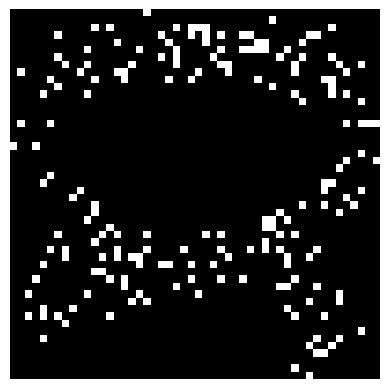

In [19]:
binary_image1  = Low_noise_Alpha_Gamma_Test_on_TDA.coordinates_to_image(samples[1][:, 0], samples[1][:, 1], image_size=(50, 50))
binary_image2  = Low_noise_Alpha_Gamma_Test_on_TDA.coordinates_to_image(samples[2][:, 0], samples[2][:, 1], image_size=(50, 50))
plt.imshow(binary_image2, cmap='gray')
plt.axis('off')
plt.show()

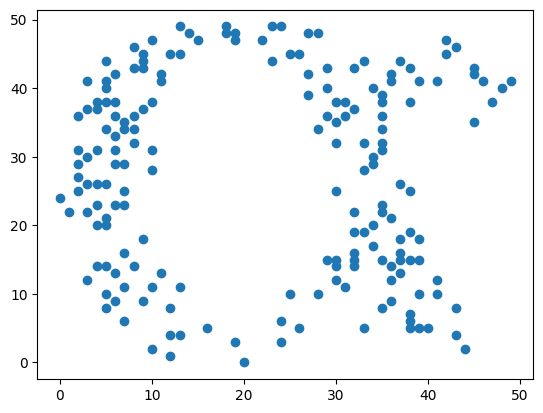

In [20]:
pointcloud = np.argwhere(binary_image1 == 1)
plt.scatter(pointcloud[:, 0], pointcloud[:, 1])
plt.show()

In [22]:
vectorList = []
for i in np.arange(n_clouds*2):
    temp = Low_noise_Alpha_Gamma_Test_on_TDA.coordinates_to_image(samples[i][:, 0], samples[i][:, 1], image_size=(50, 50))
    vectorList.append(temp)

L2Dist = np.zeros((n_clouds*2,n_clouds*2))
for i in range(n_clouds*2):
    for j in range(i+1):
        L2Dist[i,j] = Low_noise_Alpha_Gamma_Test_on_TDA.LA.norm(vectorList[i].reshape(1,2500)[0] - vectorList[j].reshape(1,2500)[0], 2)
        L2Dist[j,i] = L2Dist[i,j]

In [23]:
kmeans = Low_noise_Alpha_Gamma_Test_on_TDA.KMeans(n_clusters=2, random_state=0, n_init="auto").fit(L2Dist)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)